In [1]:
from dataloader.get import DataGetter


### Initialisation du DataGetter

In [2]:
dg=DataGetter()

### Chargement lazy des données (sans chargement des images)

In [3]:
dg.getData('train')

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,price,images
id_annonce,,,,,,,,,,,,,,,,,,,,,
35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,NaN,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,355000.0,"LazyImages(len=4, isLoaded=False)"
35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,D,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,"LazyImages(len=6, isLoaded=False)"
35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,NaN,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39000.0,"LazyImages(len=4, isLoaded=False)"
35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,D,...,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,299000.0,"LazyImages(len=6, isLoaded=False)"
35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,NaN,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,478000.0,"LazyImages(len=5, isLoaded=False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,E,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190000.0,"LazyImages(len=6, isLoaded=False)"
35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,D,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399000.0,"LazyImages(len=6, isLoaded=False)"
36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,NaN,...,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,328000.0,"LazyImages(len=5, isLoaded=False)"


In [4]:
dg.getData('test')

,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,energy_performance_category,...,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors,images
id_annonce,,,,,,,,,,,,,,,,,,,,,
35160615,maison,49.371670,3.533991,brenelle,2220,143.0,NaN,800.0,299.0,E,...,1.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
35830639,propriété,49.037190,-0.982385,torigni-sur-vire,50160,470.0,NaN,28559.0,NaN,NaN,...,1.0,20.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
36016657,appartement,47.097180,6.149253,ornans,25290,135.0,NaN,NaN,NaN,NaN,...,0.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
35759225,appartement,43.699670,7.245556,nice,6000,3637.0,3.0,NaN,210.0,D,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
35252229,divers,43.849435,6.215461,moustiers-sainte-marie,4360,600.0,NaN,NaN,NaN,NaN,...,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36052217,villa,43.117121,5.790808,sanary-sur-mer,83110,96.0,NaN,NaN,NaN,NaN,...,0.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
35823719,appartement,43.099598,5.874048,la-seyne-sur-mer,83500,71.0,3.0,NaN,51.0,B,...,1.0,8.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,"LazyImages(len=6, isLoaded=False)"
35793053,appartement,45.977895,-1.096506,fouras,17450,70.0,NaN,NaN,NaN,NaN,...,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,"LazyImages(len=4, isLoaded=False)"


Rq : pas de colonne price pour le set de test

###  Chargement des données (dont les images) via itérateur

1 - L'annonce d'identifiant : f35996577 contient les valeurs : {
  "property_type": "appartement",
  "approximate_latitude": 43.64387987003234,
  "approximate_longitude": 7.117182951005137,
  "city": "villeneuve-loubet",
  "postal_code": 6270,
  "size": 63.0,
  "floor": NaN,
  "land_size": NaN,
  "energy_performance_value": NaN,
  "energy_performance_category": NaN,
  "ghg_value": NaN,
  "ghg_category": NaN,
  "exposition": NaN,
  "nb_rooms": 3.0,
  "nb_bedrooms": 2.0,
  "nb_bathrooms": NaN,
  "nb_parking_places": 0.0,
  "nb_boxes": 0.0,
  "nb_photos": 4.0,
  "has_a_balcony": 0.0,
  "nb_terraces": 1.0,
  "has_a_cellar": 0.0,
  "has_a_garage": 0.0,
  "has_air_conditioning": 0.0,
  "last_floor": 0.0,
  "upper_floors": 0.0
} et les images de tailles [(97, 146, 3), (171, 257, 3), (66, 100, 3), (74, 100, 3)] pour un prix de 355000.0
Affichage de la première image :


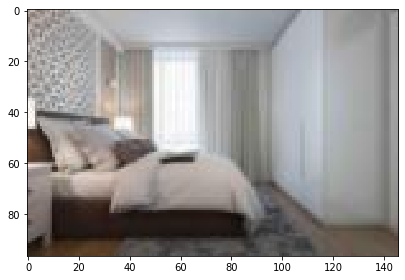




2 - L'annonce d'identifiant : f35811033 contient les valeurs : {
  "property_type": "appartement",
  "approximate_latitude": 45.695756723197945,
  "approximate_longitude": 4.89560993095212,
  "city": "venissieux",
  "postal_code": 69200,
  "size": 90.0,
  "floor": 3.0,
  "land_size": NaN,
  "energy_performance_value": 223.0,
  "energy_performance_category": "D",
  "ghg_value": 52.0,
  "ghg_category": "E",
  "exposition": NaN,
  "nb_rooms": 5.0,
  "nb_bedrooms": 4.0,
  "nb_bathrooms": NaN,
  "nb_parking_places": 0.0,
  "nb_boxes": 0.0,
  "nb_photos": 8.0,
  "has_a_balcony": 0.0,
  "nb_terraces": 0.0,
  "has_a_cellar": 0.0,
  "has_a_garage": 0.0,
  "has_air_conditioning": 0.0,
  "last_floor": 0.0,
  "upper_floors": 0.0
} et les images de tailles [(171, 228, 3), (171, 228, 3), (171, 228, 3), (171, 228, 3), (171, 228, 3), (171, 228, 3)] pour un prix de 190000.0
Affichage de la première image :


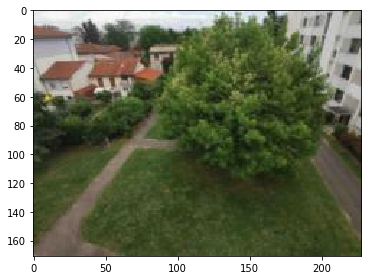




3 - L'annonce d'identifiant : f35731841 contient les valeurs : {
  "property_type": "maison",
  "approximate_latitude": 47.96679141822744,
  "approximate_longitude": -1.2204506577025136,
  "city": "moutiers",
  "postal_code": 35130,
  "size": 61.0,
  "floor": NaN,
  "land_size": 370.0,
  "energy_performance_value": NaN,
  "energy_performance_category": NaN,
  "ghg_value": NaN,
  "ghg_category": NaN,
  "exposition": "Sud",
  "nb_rooms": 2.0,
  "nb_bedrooms": 1.0,
  "nb_bathrooms": NaN,
  "nb_parking_places": 0.0,
  "nb_boxes": 0.0,
  "nb_photos": 4.0,
  "has_a_balcony": 0.0,
  "nb_terraces": 0.0,
  "has_a_cellar": 0.0,
  "has_a_garage": 0.0,
  "has_air_conditioning": 0.0,
  "last_floor": 0.0,
  "upper_floors": 0.0
} et les images de tailles [(64, 114, 3), (64, 114, 3), (64, 114, 3), (64, 114, 3)] pour un prix de 39000.0
Affichage de la première image :


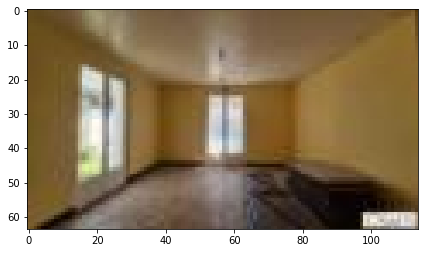




4 - L'annonce d'identifiant : f35886765 contient les valeurs : {
  "property_type": "maison",
  "approximate_latitude": 47.28929151136732,
  "approximate_longitude": -1.8788046225211363,
  "city": "cordemais",
  "postal_code": 44360,
  "size": 142.0,
  "floor": NaN,
  "land_size": 764.0,
  "energy_performance_value": 217.0,
  "energy_performance_category": "D",
  "ghg_value": 44.0,
  "ghg_category": "E",
  "exposition": NaN,
  "nb_rooms": 4.0,
  "nb_bedrooms": 3.0,
  "nb_bathrooms": NaN,
  "nb_parking_places": 0.0,
  "nb_boxes": 1.0,
  "nb_photos": 8.0,
  "has_a_balcony": 0.0,
  "nb_terraces": 1.0,
  "has_a_cellar": 0.0,
  "has_a_garage": 0.0,
  "has_air_conditioning": 0.0,
  "last_floor": 0.0,
  "upper_floors": 0.0
} et les images de tailles [(80, 107, 3), (80, 107, 3), (80, 107, 3), (142, 107, 3), (80, 107, 3), (80, 107, 3)] pour un prix de 299000.0
Affichage de la première image :


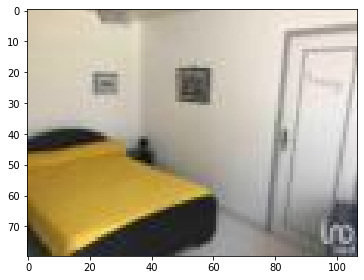




5 - L'annonce d'identifiant : f35781137 contient les valeurs : {
  "property_type": "appartement",
  "approximate_latitude": 45.718992468365904,
  "approximate_longitude": 4.844234414494792,
  "city": "lyon-7eme",
  "postal_code": 69007,
  "size": 88.0,
  "floor": 3.0,
  "land_size": NaN,
  "energy_performance_value": NaN,
  "energy_performance_category": NaN,
  "ghg_value": NaN,
  "ghg_category": NaN,
  "exposition": NaN,
  "nb_rooms": 4.0,
  "nb_bedrooms": 3.0,
  "nb_bathrooms": 1.0,
  "nb_parking_places": 0.0,
  "nb_boxes": 1.0,
  "nb_photos": 5.0,
  "has_a_balcony": 1.0,
  "nb_terraces": 0.0,
  "has_a_cellar": 0.0,
  "has_a_garage": 0.0,
  "has_air_conditioning": 0.0,
  "last_floor": 0.0,
  "upper_floors": 0.0
} et les images de tailles [(171, 257, 3), (171, 257, 3), (171, 257, 3), (171, 257, 3), (171, 257, 3)] pour un prix de 478000.0
Affichage de la première image :


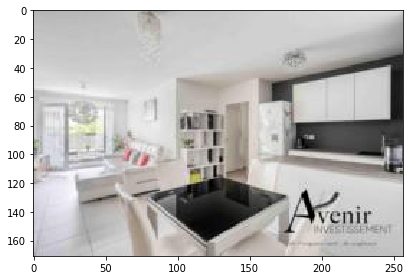

In [16]:
import json
from skimage import io
k=0
# id_annonce : Int
# X : pd.Series
# y : float
# images : list(np.array)
for id_annonce, X, images, y in dg.iterateLoadedData("train"):
    print(f"{k+1} - L'annonce d'identifiant : f{id_annonce} contient les valeurs : {json.dumps(X.to_dict(), indent=2)} et les images de tailles {[im.shape for im in images]} pour un prix de {y}")
    print("Affichage de la première image :")
    io.imshow(images[0])
    io.show()
    print("\n\n")
    
    k +=1
    if k>=5:break